In [1]:
%matplotlib inline 
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'retina' # I use a HiDPI screen

In [2]:
import gp_lens
import numpy as np
import matplotlib.pyplot as plt
default_color_list = plt.rcParams['axes.prop_cycle'].by_key()['color']

In [3]:
peaks = gp_lens.LensingPSorPeaks(-0.02, 0.06, 'K', redshifts=('10',), observable_name='Peaks', bin_center_row=0)
x, y = peaks.get_realizations(model_index=1, verbose=True)
peaks.fid = np.mean(y,axis=0)

/home/zequnl/Projects/neutrino_mpk/data/May_stats/Om0.29780_As2.10000_mva0.02175_mvb0.02338_mvc0.05486_h0.70000_Ode0.69995/Maps10/Peaks_K_s1.00_z1.00_ng13.25_b050.npy


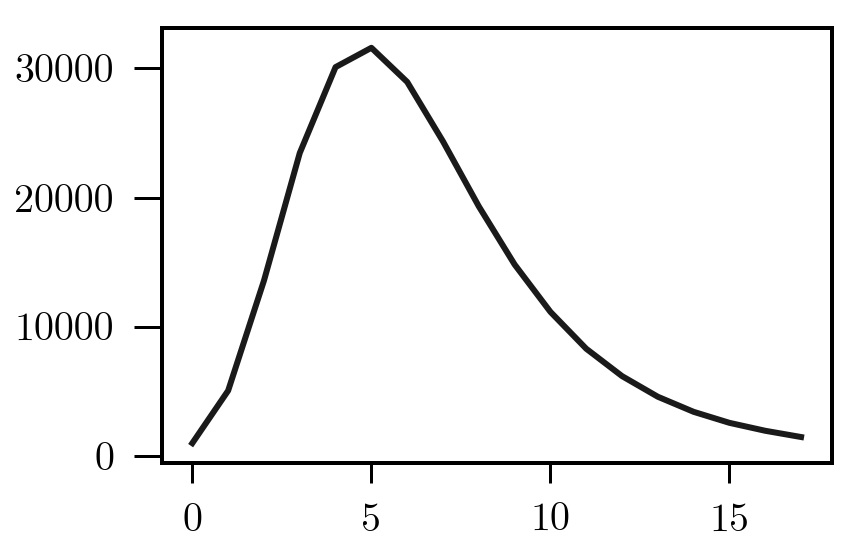

In [4]:
plt.plot(peaks.fid)

In [7]:
# powerspec = LensingPSorPeaks(300,3000, 'K', redshifts=('10',), observable_name='PS', bin_center_row=0, binscale='log')
# x, y = powerspec.get_realizations(model_index=0, verbose=True)
# powerspec.fid = np.mean(y,axis=0)
# plt.plot(powerspec.fid)

/home/zequnl/Projects/neutrino_mpk/data/May_stats/Om0.29997_As2.10000_mva0.00000_mvb0.00000_mvc0.00000_h0.70000_Ode0.69995/box5/Maps10/Peaks_K_s1.00_z1.00_ng13.25_b050.npy
(9999, 18)
nr 9999 nb 18 bin 0.9980996199239848 sky 0.001225


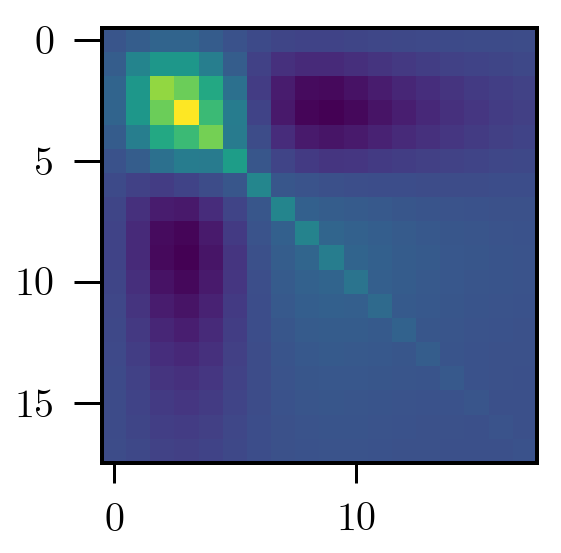

In [8]:
plt.imshow( np.linalg.inv(peaks.compute_cov(0, verbose=True) ) )

In [9]:
index_list = np.arange(len(peaks.params.T))
index_list = np.delete(index_list, 0)
index_list = np.delete(index_list, 0)

modified_y = [peaks.get_realizations(i) for i in index_list]
modified_X = (peaks.params.T[index_list]).T

peaks.fit(X=modified_X, real_list=modified_y)

/home/zequnl/Projects/neutrino_mpk/data/May_stats/Om0.29780_As2.10000_mva0.02175_mvb0.02338_mvc0.05486_h0.70000_Ode0.69995/Maps10/Peaks_K_s1.00_z1.00_ng13.25_b050.npy
(9999, 18)


(-0.02, 0.02)

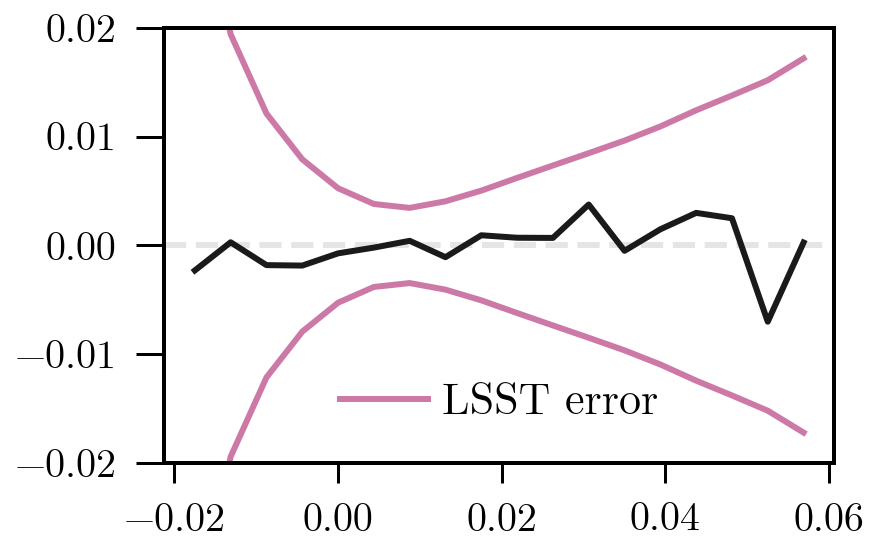

In [10]:
test_model = 1
x, y = peaks.get_realizations(model_index=1, verbose=True)
y_true = np.mean(y, axis=0)

plt.axhline(0.0, color=(0,0,0,0.1), ls='dashed')

ys, sigs = peaks.GP(peaks.params.T[1])
# plt.fill_between( x, (sigs/y_true), (-sigs/y_true), color=default_color_list[3], alpha=0.2)

# plt.plot(ys)
plt.plot( x, (ys-y_true)/y_true, '-')

invcov = peaks.compute_cov(0)
cov = np.linalg.inv(invcov)
plt.plot( x, np.sqrt(np.diag(cov))/y_true, label='LSST error', color=default_color_list[4] )
plt.plot( x, -np.sqrt(np.diag(cov))/y_true, color=default_color_list[4] )

plt.legend()
plt.ylim(-0.02, 0.02)

In [11]:
peaks.likelihood([0.1,0.3,2.1])

-0.5495865216334878